#  Problem Statement

The growing number of IoT devices increases vulnerability to cyberattacks that traditional Intrusion Detection Systems (IDS) struggle to detect. Anomaly-Based IDS can identify unknown threats but vary in performance and efficiency. This study compares two anomaly-based models to find which achieves higher detection accuracy, scalability, and reliability in IoT environments.

#

Two anomaly-based models were chosen because they would instantly detect previously unseen or evolving IoT attacks by learning normal network behavior and identifying deviations, making them more effective than signature-based approaches in dynamic IoT environments.

Model Selection

Neural Network (NN): Learns complex data patterns, serving as a strong baseline for anomaly detection.

Long Short Term Memory(LSTM): Captures temporal patterns in network traffic, making it suitable for time-dependent IoT attacks.

The comparison will reveal which model offers better accuracy and adaptability for real-world IoT intrusion detection.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import (
    f1_score, roc_auc_score, roc_curve,
    confusion_matrix, classification_report
)

In [2]:
df = pd.read_csv('/content/IoMT_attacks.csv')
df

,Dir,Flgs,SrcAddr,DstAddr,Sport,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,...,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
0,->,e,10.0.1.172,10.0.1.150,58059,1111,496,186,276914.0,92305.0,...,1,28.9,0,0,0,0,0,0,0.0,0
1,->,e,10.0.1.172,10.0.1.150,58062,1111,496,186,230984.0,76995.0,...,2,28.9,0,0,0,0,78,17,0.4,0
2,->,e,10.0.1.172,10.0.1.150,58065,1111,496,186,218470.0,72823.0,...,3,28.9,89,104,0,0,78,17,0.4,0
3,->,e,10.0.1.172,10.0.1.150,58067,1111,496,186,203376.0,67792.0,...,4,28.9,89,104,0,0,79,17,0.4,0
4,->,e,10.0.1.172,10.0.1.150,58069,1111,496,186,235723.0,78574.0,...,5,28.9,89,101,0,0,79,17,0.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16313,->,e,10.0.1.172,10.0.1.150,57348,1111,496,186,205128.0,68376.0,...,16310,27.7,98,73,148,84,73,19,0.3,0
16314,->,e,10.0.1.172,10.0.1.150,63265,1111,496,186,274058.0,91353.0,...,16311,27.7,98,73,148,84,73,19,0.3,0
16315,->,e,10.0.1.172,10.0.1.150,63918,1111,496,186,288568.0,96189.0,...,16312,23.6,98,73,148,84,73,19,0.3,0
16316,->,e,10.0.1.172,10.0.1.150,52345,1111,496,186,237795.0,79265.0,...,16313,27.4,98,73,148,84,73,19,0.3,0


# Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dir         16318 non-null  object 
 1   Flgs        16318 non-null  object 
 2   SrcAddr     16318 non-null  object 
 3   DstAddr     16318 non-null  object 
 4   Sport       16318 non-null  object 
 5   Dport       16318 non-null  int64  
 6   SrcBytes    16318 non-null  int64  
 7   DstBytes    16318 non-null  int64  
 8   SrcLoad     16318 non-null  float64
 9   DstLoad     16318 non-null  float64
 10  SrcGap      16318 non-null  int64  
 11  DstGap      16318 non-null  int64  
 12  SIntPkt     16318 non-null  float64
 13  DIntPkt     16318 non-null  float64
 14  SIntPktAct  16318 non-null  float64
 15  DIntPktAct  16318 non-null  int64  
 16  SrcJitter   16318 non-null  float64
 17  DstJitter   16318 non-null  float64
 18  sMaxPktSz   16318 non-null  int64  
 19  dMaxPktSz   16318 non-nul

In [4]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
         Dport      SrcBytes      DstBytes       SrcLoad       DstLoad  \
count  16318.0  16318.000000  16318.000000  1.631800e+04  1.631800e+04   
mean    1111.0    496.650264    187.077706  2.118406e+05  7.102435e+04   
std        0.0     28.584642     18.688525  7.942988e+04  4.530811e+04   
min     1111.0    310.000000    120.000000  0.000000e+00  5.074470e+02   
25%     1111.0    496.000000    186.000000  1.990535e+05  6.635500e+04   
50%     1111.0    496.000000    186.000000  2.366790e+05  7.889300e+04   
75%     1111.0    496.000000    186.000000  2.615570e+05  8.719300e+04   
max     1111.0   2298.000000    882.000000  1.134000e+06  3.938000e+06   

        SrcGap   DstGap       SIntPkt       DIntPkt    SIntPktAct  ...  \
count  16318.0  16318.0  16318.000000  16318.000000  16318.000000  ...   
mean       0.0      0.0     10.946755      8.515423      1.286918  ...   
std        0.0      0.0    101.230484     52.504560     62.123452  ...   
min        0.0    

In [5]:
# Check dataset info, missing values, and label distribution
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['Label'].value_counts())



Shape: (16318, 44)

Missing values:
 Dir           0
Flgs          0
SrcAddr       0
DstAddr       0
Sport         0
Dport         0
SrcBytes      0
DstBytes      0
SrcLoad       0
DstLoad       0
SrcGap        0
DstGap        0
SIntPkt       0
DIntPkt       0
SIntPktAct    0
DIntPktAct    0
SrcJitter     0
DstJitter     0
sMaxPktSz     0
dMaxPktSz     0
sMinPktSz     0
dMinPktSz     0
Dur           0
Trans         0
TotPkts       0
TotBytes      0
Load          0
Loss          0
pLoss         0
pSrcLoss      0
pDstLoss      0
Rate          0
SrcMac        0
DstMac        0
Packet_num    0
Temp          0
SpO2          0
Pulse_Rate    0
SYS           0
DIA           0
Heart_rate    0
Resp_Rate     0
ST            0
Label         0
dtype: int64

Class Distribution:
 Label
0    14272
1     2046
Name: count, dtype: int64


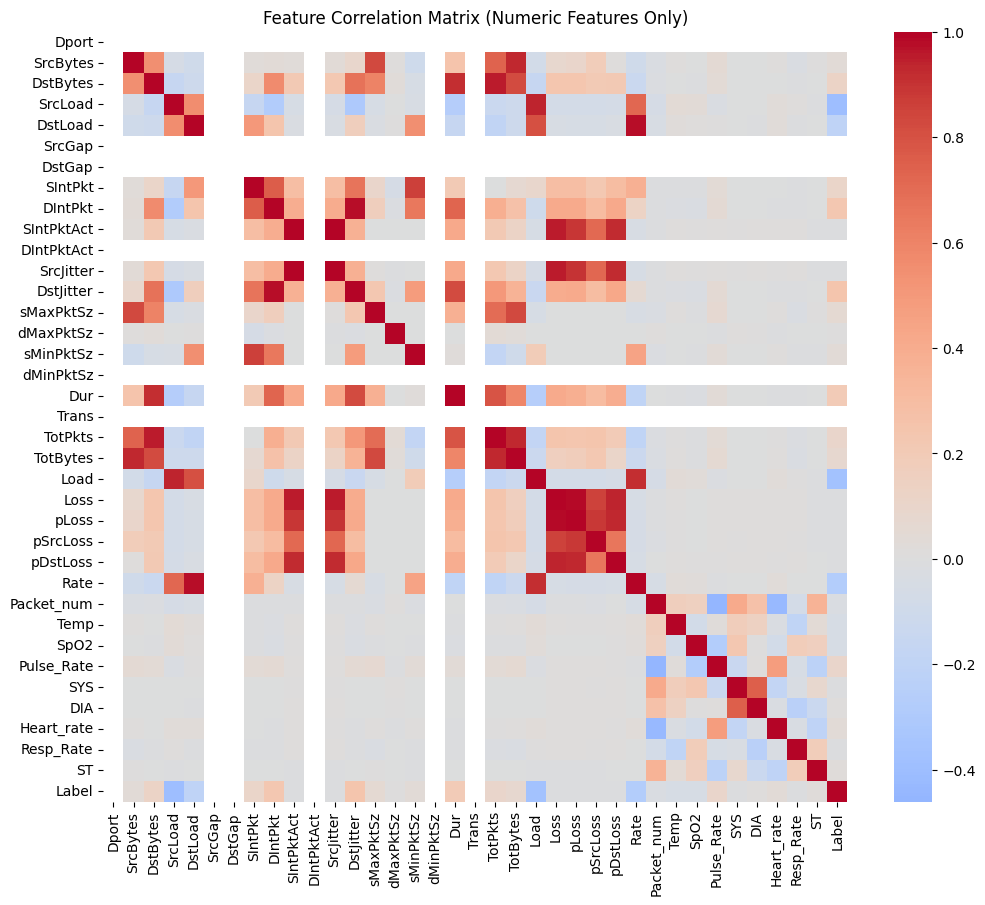

In [6]:
# Compute correlation only on numeric columns to avoid ValueError
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Numeric Features Only)')
plt.show()



Most features show weak correlation, meaning they provide unique information, while a few traffic-related metrics (like bytes and packets) are strongly correlated, as expected.

All columns have no missing values. The class distribution shows that most of the
network flow as normal(0) traffic which equals to 14272 and smalled portion are labeled as attack (1) which equals to 2046. This type of
class imbalance is common in datasets, it also shows that there might be some outliers. the class imbalance must be handle to avoid
bias towards the normal (0) traffic.


These EDA results are useful because they help explain how the network connextion might signal normal or abnormal activity. The class
imbalance shows how the network traffic shows most normal but also shows attacks a minority. This is relateable to real IoMT device
connections.


This dataset has two labels:
*   0 likely represents normal traffic
*   1 represents attack or malicious traffic.




#  Data Cleaning

Replace space with "_"

In [7]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') )
df.columns = cols
print(df.head())

     Dir        Flgs     SrcAddr     DstAddr  Sport  Dport  SrcBytes  \
0     ->   e          10.0.1.172  10.0.1.150  58059   1111       496   
1     ->   e          10.0.1.172  10.0.1.150  58062   1111       496   
2     ->   e          10.0.1.172  10.0.1.150  58065   1111       496   
3     ->   e          10.0.1.172  10.0.1.150  58067   1111       496   
4     ->   e          10.0.1.172  10.0.1.150  58069   1111       496   

   DstBytes   SrcLoad  DstLoad  ...  Packet_num  Temp  SpO2  Pulse_Rate  SYS  \
0       186  276914.0  92305.0  ...           1  28.9     0           0    0   
1       186  230984.0  76995.0  ...           2  28.9     0           0    0   
2       186  218470.0  72823.0  ...           3  28.9    89         104    0   
3       186  203376.0  67792.0  ...           4  28.9    89         104    0   
4       186  235723.0  78574.0  ...           5  28.9    89         101    0   

   DIA  Heart_rate  Resp_Rate   ST  Label  
0    0           0          0  0.0      0 

Checking for null and INFINITE

In [8]:
#replace infinit number
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

#drop null
df.dropna(how = 'all')

,Dir,Flgs,SrcAddr,DstAddr,Sport,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,...,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
0,->,e,10.0.1.172,10.0.1.150,58059,1111,496,186,276914.0,92305.0,...,1,28.9,0,0,0,0,0,0,0.0,0
1,->,e,10.0.1.172,10.0.1.150,58062,1111,496,186,230984.0,76995.0,...,2,28.9,0,0,0,0,78,17,0.4,0
2,->,e,10.0.1.172,10.0.1.150,58065,1111,496,186,218470.0,72823.0,...,3,28.9,89,104,0,0,78,17,0.4,0
3,->,e,10.0.1.172,10.0.1.150,58067,1111,496,186,203376.0,67792.0,...,4,28.9,89,104,0,0,79,17,0.4,0
4,->,e,10.0.1.172,10.0.1.150,58069,1111,496,186,235723.0,78574.0,...,5,28.9,89,101,0,0,79,17,0.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16313,->,e,10.0.1.172,10.0.1.150,57348,1111,496,186,205128.0,68376.0,...,16310,27.7,98,73,148,84,73,19,0.3,0
16314,->,e,10.0.1.172,10.0.1.150,63265,1111,496,186,274058.0,91353.0,...,16311,27.7,98,73,148,84,73,19,0.3,0
16315,->,e,10.0.1.172,10.0.1.150,63918,1111,496,186,288568.0,96189.0,...,16312,23.6,98,73,148,84,73,19,0.3,0
16316,->,e,10.0.1.172,10.0.1.150,52345,1111,496,186,237795.0,79265.0,...,16313,27.4,98,73,148,84,73,19,0.3,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dir         16318 non-null  object 
 1   Flgs        16318 non-null  object 
 2   SrcAddr     16318 non-null  object 
 3   DstAddr     16318 non-null  object 
 4   Sport       16318 non-null  object 
 5   Dport       16318 non-null  int64  
 6   SrcBytes    16318 non-null  int64  
 7   DstBytes    16318 non-null  int64  
 8   SrcLoad     16318 non-null  float64
 9   DstLoad     16318 non-null  float64
 10  SrcGap      16318 non-null  int64  
 11  DstGap      16318 non-null  int64  
 12  SIntPkt     16318 non-null  float64
 13  DIntPkt     16318 non-null  float64
 14  SIntPktAct  16318 non-null  float64
 15  DIntPktAct  16318 non-null  int64  
 16  SrcJitter   16318 non-null  float64
 17  DstJitter   16318 non-null  float64
 18  sMaxPktSz   16318 non-null  int64  
 19  dMaxPktSz   16318 non-nul

Drop all column contain object datatype exept Label

In [10]:
df = df.drop(columns=['Dir', 'Flgs', 'SrcAddr', 'DstAddr','Sport', 'SrcMac', 'DstMac'])
print("columns are dropped: Dir, Flgs, SrcAddr, DstAddr,Sport, SrcMac, DstMac")

columns are dropped: Dir, Flgs, SrcAddr, DstAddr,Sport, SrcMac, DstMac


# Data Analysis

Filtering by Class

In [11]:
# Split the dataset into normal and attack traffic
normal_df = df[df['Label'] == 0]
attack_df = df[df['Label'] == 1]

<Axes: xlabel='Dur', ylabel='TotPkts'>

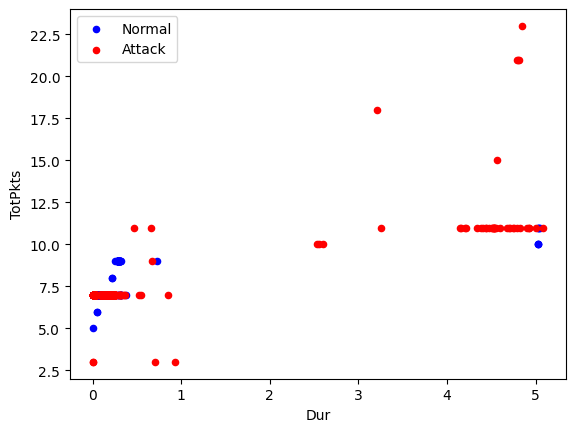

In [12]:
# Create a scatter plot comparing flow duration vs total forward packets
axes = normal_df.plot(
    kind='scatter',
    x='Dur',
    y='TotPkts',
    color='blue',
    label='Normal'
)

attack_df.plot(
    kind='scatter',
    x='Dur',
    y='TotPkts',
    color='red',
    label='Attack',
    ax=axes
)

The scatter plot shows that normal IoMT traffic (blue) has short durations and few packets, while attack traffic (red) has longer durations and higher packet counts.
This indicates that attacks generate heavier or more sustained flows, making Dur and TotPkts strong indicators for distinguishing malicious activity.

Converting categorical variables to integers

In [13]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

print('Data type of each column of Dataframe :')
df.info(verbose=True)



Index([], dtype='object')
Index([], dtype='object')
Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dport       16318 non-null  int64  
 1   SrcBytes    16318 non-null  int64  
 2   DstBytes    16318 non-null  int64  
 3   SrcLoad     16318 non-null  float64
 4   DstLoad     16318 non-null  float64
 5   SrcGap      16318 non-null  int64  
 6   DstGap      16318 non-null  int64  
 7   SIntPkt     16318 non-null  float64
 8   DIntPkt     16318 non-null  float64
 9   SIntPktAct  16318 non-null  float64
 10  DIntPktAct  16318 non-null  int64  
 11  SrcJitter   16318 non-null  float64
 12  DstJitter   16318 non-null  float64
 13  sMaxPktSz   16318 non-null  int64  
 14  dMaxPktSz   16318 non-null  int64  
 15  sMinPktSz   16318 non-null  int64  
 16  dMinPktSz   16318 non-null  int64  
 17  Dur         163

# Train - Test Split (80:20)

In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% for testing
    stratify=y,          # preserve class distribution
    random_state=42      # reproducibility
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))


Training data shape: (13054, 36)
Testing data shape: (3264, 36)

Class distribution in training set:
Label
0    0.874598
1    0.125402
Name: proportion, dtype: float64

Class distribution in test set:
Label
0    0.874694
1    0.125306
Name: proportion, dtype: float64


Class Imbalance handling

In [15]:

# Compute class weights directly from your training labels
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',   # balances by inverse of class frequency
    classes=classes,
    y=y_train
)

# Convert to dictionary for Keras
class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

Class Weights: {np.int64(0): np.float64(0.5716913374791976), np.int64(1): np.float64(3.987171655467318)}


Feature Scaling

In [16]:
# Scale
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

Class imbalance handling makes the model pay more attention to rare attack samples so it doesn’t get biased toward normal traffic.

Scaling puts all features on similar ranges so the neural network trains faster and learns fairly from all inputs.

# Model Training

# MLP classifier -> Model Training

- It is a muti layer perceptron classifier which is a type of feed forward artificial neural network.
- It is can be found in sckit-learn
- It is structures as:


1.   Input layer: one neuron per feature (e.g., 44 features → 44 input neurons).

2. Hidden layers: you specify them (e.g., (64, 32) = two hidden layers with 64 and 32 neurons).

3. Output layer: one neuron per class (e.g., 1 for binary, or multiple for multiclass).

It learns through Backpropagation, using activition functions, and loss minimization.




The MLP diagram shows how input features pass through hidden layers to learn patterns and produce an output — predicting whether traffic is normal or an attack

In [17]:
# Define Sequential model
# Input layer
# Hidden Layer
# Dropout
# Output Layer
n_features = X_train_scaled.shape[1]
model = tf.keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])


In [18]:
# Complie the model
# Adam optimizer for adaptive learning
# Binary crossentropy and so on


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [19]:
# Early stopping stops training if validation loss doesn’t improve
# for 8 consecutive epochs and restores the best weights
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

In [20]:
# train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stop],
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6656 - auc: 0.6592 - loss: 1.4637 - precision: 0.2069 - recall: 0.5578 - val_accuracy: 0.8751 - val_auc: 0.8328 - val_loss: 0.6169 - val_precision: 0.4599 - val_recall: 0.5184
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8426 - auc: 0.7749 - loss: 0.6874 - precision: 0.4087 - recall: 0.4983 - val_accuracy: 0.8744 - val_auc: 0.8406 - val_loss: 0.5279 - val_precision: 0.4589 - val_recall: 0.5418
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8445 - auc: 0.8160 - loss: 0.7691 - precision: 0.4266 - recall: 0.5583 - val_accuracy: 0.8548 - val_auc: 0.8420 - val_loss: 0.5264 - val_precision: 0.4057 - val_recall: 0.5753
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8355 - auc: 0.8068 - loss: 0.6018 - precision: 0.3873 - recall: 0.5538 - val_accuracy: 0.8656 - val_auc: 0.8461 - val_loss: 0.4678 - val_precision: 0.4340 - val_recall: 0.5719
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━

Model Evaluation

In [21]:
# Evaluate basic metrics
test_loss, test_accuracy, test_auc, test_precision, test_recall = model.evaluate(X_test_scaled, y_test, verbose=2)

# Make predictions on the test data
y_pred_probs = model.predict(X_test_scaled, verbose=0).ravel()   # probabilities between 0 and 1
y_pred = (y_pred_probs >= 0.5).astype(int)                       # convert to binary predictions

# Compute F1-score
f1 = f1_score(y_test, y_pred)

# Display results neatly
print(f"\nTest Accuracy:  {test_accuracy:.4f}")
print(f"Test AUC:       {test_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall:    {test_recall:.4f}")
print(f"Test F1-Score:  {f1:.4f}")

102/102 - 0s - 2ms/step - accuracy: 0.8542 - auc: 0.9259 - loss: 0.3236 - precision: 0.4544 - recall: 0.8166

Test Accuracy:  0.8542
Test AUC:       0.9259
Test Precision: 0.4544
Test Recall:    0.8166
Test F1-Score:  0.5839


In [22]:
# 1) Get predicted probabilities and hard labels (threshold = 0.5)
probs = model.predict(X_test_scaled, verbose=0).ravel()   # sigmoid probabilities in [0,1]
y_pred = (probs >= 0.5).astype(int)


Confusion Matrix (counts):
 [[2454  401]
 [  75  334]]


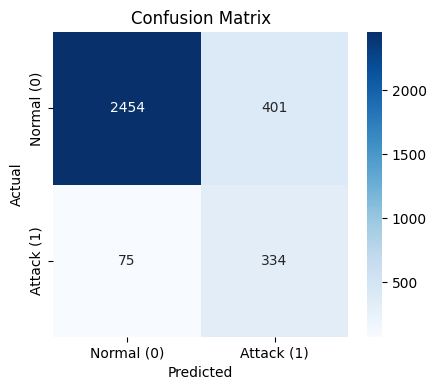

In [23]:
# Confusion Matrix (numbers + heatmap)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (counts):\n", cm)

plt.figure(figsize=(4.5, 4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Normal (0)', 'Attack (1)'],
    yticklabels=['Normal (0)', 'Attack (1)']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

| Metric        | Value     | Meaning                               |
| :------------ | :-------- | :------------------------------------ |
| **Accuracy**  | **0.853** | 85% of total predictions were correct |
| **AUC**       | **0.927** | Model distinguishes classes very well |
| **Precision** | **0.452** | Some false positives                  |
| **Recall**    | **0.804** | Strong attack detection               |
| **F1**        | **0.579** | Moderate overall detection strength   |


The model achieves 85% accuracy, which is solid overall.
However, its real strength is high recall 80% which means it successfully detects most attacks.
For intrusion detection, that’s often more valuable than slightly higher accuracy.

Latency Measurement function

In [24]:
print("Model input shape:", model.input_shape)
print("Model summary:")
model.summary()


Model input shape: (None, 36)
Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,445 (52.52 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,964 (35.02 KB)

In [25]:
import time

X_test_np = np.asarray(X_test_scaled, dtype="float32")
n_samples = X_test_np.shape[0]
print("Test shape:", X_test_np.shape)


Test shape: (3264, 36)


In [26]:
# Warm-up on a small batch so the first call overhead is not counted
_ = model.predict(X_test_np[:256], batch_size=256, verbose=0)

# Timed full-batch inference
start = time.perf_counter()
_ = model.predict(X_test_np, batch_size=256, verbose=0)
end = time.perf_counter()

total_time = end - start
latency_per_sample = total_time / n_samples      # seconds per sample
throughput = n_samples / total_time              # samples per second

print(f"Total inference time: {total_time:.4f} s")
print(f"Average latency: {latency_per_sample * 1000:.4f} ms/sample")
print(f"Throughput: {throughput:.2f} samples/second")


Total inference time: 0.0959 s
Average latency: 0.0294 ms/sample
Throughput: 34026.13 samples/second


In [27]:
import platform
import psutil

# OS info
print("OS:", platform.system(), platform.release())
print("OS version:", platform.version())

# CPU info
print("Processor:", platform.processor())
print("Physical cores:", psutil.cpu_count(logical=False))
print("Logical cores:", psutil.cpu_count(logical=True))

# RAM info
ram_gb = psutil.virtual_memory().total / (1024 ** 3)
print(f"RAM: {ram_gb:.2f} GB")


OS: Linux 6.6.105+
OS version: #1 SMP Thu Oct  2 10:42:05 UTC 2025
Processor: x86_64
Physical cores: 1
Logical cores: 2
RAM: 12.67 GB


In [28]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs detected:")
    for gpu in gpus:
        print(" ", gpu)
else:
    print("No GPU detected, running on CPU only.")


No GPU detected, running on CPU only.


In [29]:
import tensorflow as tf
import sklearn
import sys

print("Python version:", sys.version.split()[0])
print("TensorFlow version:", tf.__version__)
print("scikit-learn version:", sklearn.__version__)


Python version: 3.12.12
TensorFlow version: 2.19.0
scikit-learn version: 1.6.1


In [30]:
# Which two features are correlated to give out a better

Feature Correlation for Better Intrusion Detection

Analysis of the numeric feature correlation matrix shows that most IoMT traffic features are weakly correlated, meaning they provide unique information to the model. However, two features stand out as strongly correlated with malicious activity and therefore significantly improve intrusion detection performance:

1. Flow Duration (Dur)
2. Total Packets (TotPkts)

These two features show a meaningful relationship where:

Normal traffic tends to have shorter durations and fewer packets.

Attack traffic often produces long-lasting flows with a higher number of packets, indicating heavier or more sustained activity.

The scatterplot of Dur vs. TotPkts visually confirms that distributed or continuous attack flows cluster in a different region than normal device traffic. Because attacks frequently generate abnormal spikes in packet count over extended durations, combining these features captures behavioral changes indicative of intrusions.

Why These Features Improve Detection

They capture temporal behavior (how long a connection lasts).

They reflect network load patterns (how many packets are exchanged).

Attacks often produce out-of-distribution patterns in these dimensions.

Models such as Neural Networks and LSTM can learn nonlinear interactions between these two features, improving anomaly detection accuracy.

Conclusion

Dur and TotPkts form one of the most informative feature pairs for distinguishing between normal and malicious IoT traffic. Their strong relationship provides the model with a clearer boundary between benign flows and attack behavior, leading to better detection outcomes.

# LSTM -> Model Training

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, confusion_matrix, classification_report

Create sequence windows

In [32]:
seq_len = 10  # sequence length can experiment with 5, 10,

# Reset indices so X and y align nicely
y_train_reset = y_train.reset_index(drop=True)
y_test_reset  = y_test.reset_index(drop=True)

def make_windows(X, y, seq_len):
    """
    Create non-overlapping sequences of length seq_len.
    Label of each sequence:
        1 if ANY attack (1) exists in the window, else 0.
    X: numpy array of shape (n_samples, n_features)
    y: 1D array-like of shape (n_samples,)
    """
    X_seqs = []
    y_seqs = []

    n_samples = X.shape[0]
    for start in range(0, n_samples, seq_len):
        end = start + seq_len
        X_chunk = X[start:end]
        y_chunk = y[start:end]

        if len(X_chunk) == 0:
            continue

        X_seqs.append(X_chunk)

        # New rule: window is attack if ANY 1 in the chunk
        label = int((y_chunk == 1).any())
        y_seqs.append(label)

    return X_seqs, np.array(y_seqs)

In [33]:
#SHUFFLE BEFORE WINDOWING

# Shuffle TRAIN
train_df_shuf = pd.DataFrame(X_train_scaled)
train_df_shuf['Label'] = y_train_reset
train_df_shuf = train_df_shuf.sample(frac=1, random_state=42).reset_index(drop=True)

X_train_shuf = train_df_shuf.drop('Label', axis=1).values
y_train_shuf = train_df_shuf['Label'].values

# Shuffle TEST
test_df_shuf = pd.DataFrame(X_test_scaled)
test_df_shuf['Label'] = y_test_reset
test_df_shuf = test_df_shuf.sample(frac=1, random_state=42).reset_index(drop=True)

X_test_shuf = test_df_shuf.drop('Label', axis=1).values
y_test_shuf = test_df_shuf['Label'].values

# Now create windows on SHUFFLED data
train_sequences_raw, y_train_seq = make_windows(X_train_shuf, y_train_shuf, seq_len)
test_sequences_raw,  y_test_seq  = make_windows(X_test_shuf,  y_test_shuf,  seq_len)

print("Window label distribution (sequence level):")
print("Train windows:", np.unique(y_train_seq, return_counts=True))
print("Test  windows:", np.unique(y_test_seq, return_counts=True))


Window label distribution (sequence level):
Train windows: (array([0, 1]), array([358, 948]))
Test  windows: (array([0, 1]), array([ 81, 246]))


In [34]:
# Compute SEQUENCE-LEVEL class weights

classes_seq = np.unique(y_train_seq)
class_weights_seq = compute_class_weight(
    class_weight='balanced',
    classes=classes_seq,
    y=y_train_seq
)
class_weight_seq_dict = dict(zip(classes_seq, class_weights_seq))
print("Sequence-level class weights:", class_weight_seq_dict)

Sequence-level class weights: {np.int64(0): np.float64(1.824022346368715), np.int64(1): np.float64(0.6888185654008439)}


In [35]:
# Pad sequences into 3D tensors for LSTM

n_features = X_train_scaled.shape[1]
max_len = seq_len

def pad_multivariate_sequences(sequences, maxlen, n_features):
    """
    sequences: list of arrays (timesteps_i, n_features)
    returns: array (n_sequences, maxlen, n_features)
    """
    flat_seqs = [seq.reshape(-1) for seq in sequences]

    padded_flat = pad_sequences(
        flat_seqs,
        maxlen=maxlen * n_features,
        padding='post',
        truncating='post',
        dtype='float32'
    )

    return padded_flat.reshape(len(padded_flat), maxlen, n_features)

X_train_lstm = pad_multivariate_sequences(train_sequences_raw, max_len, n_features)
X_test_lstm  = pad_multivariate_sequences(test_sequences_raw,  max_len, n_features)

print("LSTM train shape:", X_train_lstm.shape)
print("LSTM test shape:",  X_test_lstm.shape)


LSTM train shape: (1306, 10, 36)
LSTM test shape: (327, 10, 36)


In [36]:
# One-hot encode labels for softmax output

num_classes = 2

y_train_cat = to_categorical(y_train_seq, num_classes=num_classes)
y_test_cat  = to_categorical(y_test_seq,  num_classes=num_classes)

print("y_train_cat shape:", y_train_cat.shape)
print("y_test_cat shape:",  y_test_cat.shape)


y_train_cat shape: (1306, 2)
y_test_cat shape: (327, 2)


In [37]:
# Build the LSTM model

seq_length = X_train_lstm.shape[1]
n_features = X_train_lstm.shape[2]

model = Sequential()
model.add(Input(shape=(seq_length, n_features)))
model.add(
    LSTM(
        32,
        return_sequences=True,
        dropout=0.3,
        recurrent_dropout=0.3,
        kernel_regularizer=l2(1e-4)
    )
)
model.add(
    LSTM(
        16,
        return_sequences=False,
        dropout=0.3,
        recurrent_dropout=0.3,
        kernel_regularizer=l2(1e-4)
    )
)
model.add(Dense(16, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 32)         │         8,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,274 (47.95 KB)

 Trainable params: 12,274 (47.95 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Compile & train

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(
    X_train_lstm,
    y_train_cat,
    epochs=100,
    batch_size=256,
    validation_split=0.2,              # same pattern as MLP
    callbacks=[early_stop],
    class_weight=class_weight_seq_dict,  # sequence-level class weights
    verbose=1
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.5760 - auc: 0.6172 - loss: 0.6998 - precision: 0.5760 - recall: 0.5760 - val_accuracy: 0.6794 - val_auc: 0.7651 - val_loss: 0.6779 - val_precision: 0.6794 - val_recall: 0.6794
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6054 - auc: 0.6517 - loss: 0.6907 - precision: 0.6054 - recall: 0.6054 - val_accuracy: 0.6985 - val_auc: 0.7626 - val_loss: 0.6727 - val_precision: 0.6985 - val_recall: 0.6985
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5736 - auc: 0.5978 - loss: 0.6972 - precision: 0.5736 - recall: 0.5736 - val_accuracy: 0.7099 - val_auc: 0.7509 - val_loss: 0.6684 - val_precision: 0.7099 - val_recall: 0.7099
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5612 - auc: 0.5879 - loss: 0.6863 - precision: 0.5612 - recall: 0.5612 - val_accuracy: 0.6947 - val_auc: 0.7530 - val_loss: 0.6603 - val_precision: 0.6947 - val_recall: 0.6947
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s

In [39]:
# Evaluation

# Evaluate basic metrics on the test set
test_loss, test_accuracy, test_auc, test_precision, test_recall = model.evaluate(
    X_test_lstm,
    y_test_cat,
    verbose=2
)

#  Get predicted probabilities for class 1 (attack)
# model.predict -> shape (n_samples, 2) because of softmax
y_pred_probs_full = model.predict(X_test_lstm, verbose=0)   # [[p0, p1], [p0, p1], ...]
y_pred_probs = y_pred_probs_full[:, 1]                      # probability of class 1

#  Convert probabilities to binary predictions with threshold 0.5
y_pred = (y_pred_probs >= 0.5).astype(int)

#  Compute F1-score using the true 0/1 labels
f1 = f1_score(y_test_seq, y_pred)

# Display results neatly (same style as your MLP)
print(f"\nTest Accuracy:  {test_accuracy:.4f}")
print(f"Test AUC:       {test_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall:    {test_recall:.4f}")
print(f"Test F1-Score:  {f1:.4f}")

# detailed classification report
print("\nClassification report:")
print(classification_report(y_test_seq, y_pred, digits=4))

11/11 - 0s - 9ms/step - accuracy: 0.7156 - auc: 0.8482 - loss: 0.4402 - precision: 0.7156 - recall: 0.7156

Test Accuracy:  0.7156
Test AUC:       0.8482
Test Precision: 0.7156
Test Recall:    0.7156
Test F1-Score:  0.7704

Classification report:
              precision    recall  f1-score   support

           0     0.4643    0.9630    0.6265        81
           1     0.9811    0.6341    0.7704       246

    accuracy                         0.7156       327
   macro avg     0.7227    0.7986    0.6984       327
weighted avg     0.8531    0.7156    0.7347       327




Confusion Matrix (counts):
 [[ 78   3]
 [ 90 156]]


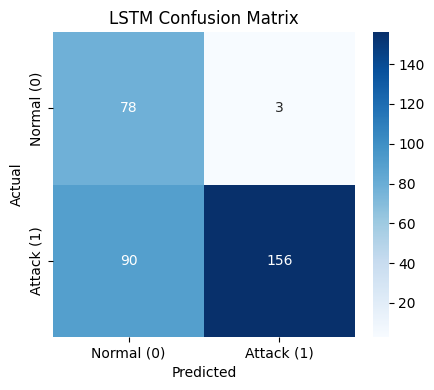

In [40]:
# Confusion Matrix (numbers + heatmap)
cm = confusion_matrix(y_test_seq, y_pred)
print("\nConfusion Matrix (counts):\n", cm)

plt.figure(figsize=(4.5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Normal (0)', 'Attack (1)'],
    yticklabels=['Normal (0)', 'Attack (1)']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Confusion Matrix')
plt.tight_layout()
plt.show()

In [41]:
lstm_model = model


# Ensure proper dtype
X_test_seq = np.asarray(X_test_lstm, dtype="float32")
n_sequences, seq_len, n_features = X_test_seq.shape
print("LSTM test shape:", X_test_seq.shape)  # (num_sequences, 10, 36)

# Warm-up a small batch
_ = lstm_model.predict(X_test_seq[:32], batch_size=32, verbose=0)

# Timed full-batch inference
start = time.perf_counter()
_ = lstm_model.predict(X_test_seq, batch_size=32, verbose=0)
end = time.perf_counter()

total_time = end - start
latency_per_sequence = total_time / n_sequences          # seconds per window
throughput_sequences = n_sequences / total_time          # windows per second

print(f"Total LSTM inference time: {total_time:.4f} s")
print(f"Average latency: {latency_per_sequence * 1000:.4f} ms/sequence")
print(f"Throughput: {throughput_sequences:.2f} sequences/second")

LSTM test shape: (327, 10, 36)
Total LSTM inference time: 0.1194 s
Average latency: 0.3650 ms/sequence
Throughput: 2739.43 sequences/second
